In [3]:
%matplotlib notebook
# starter code
import random
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
from graph_tool.all import load_graph, shortest_distance, GraphView, pbfs_search, BFSVisitor, Graph, min_spanning_tree
from networkx.drawing.nx_agraph import graphviz_layout

from cascade import gen_nontrivial_cascade
from utils import get_rank_index

seed = 123456
random.seed(seed)
np.random.seed(seed)

gtype = 'grid'
g = load_graph('data/{}/2-6/graph.gt'.format(gtype))
gnx = nx.read_graphml('data/{}/2-6/graph.graphml'.format(gtype))
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
N1, N2 = 100, 100
p, q = 0.5, 0.5

pos = graphviz_layout(gnx, root=0)

In [1]:
import pickle as pkl
p = 'outputs/paper_experiment/grid-64/si/tbfs/qs/0.1/1.pkl'
infection_times, source, obs_nodes, true_edges, pred_edges = pkl.load(open(p, 'rb'))

In [4]:
from utils import edges2graph
true_tree = edges2graph(g, true_edges)
pred_tree = edges2graph(g, pred_edges)
root = next(v for v in pred_tree.vertices() if v.in_degree() == 0 and v.out_degree() > 0)
print(root)

42


<IPython.core.display.Javascript object>


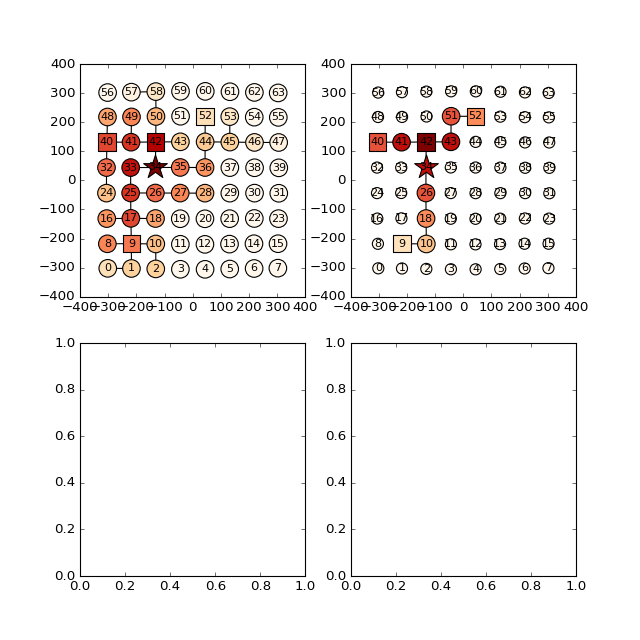

In [7]:
from plot_utils import plot_snapshot
from utils import extract_edges
from ic import get_infection_time
def infer_infection_time_from_tree(t, source):
    t = GraphView(t)
    b = t.new_vertex_property('bool')
    b.a = True
    t.set_vertex_filter(b)
    times = get_infection_time(t, source=source)
    return times

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0, 0],
              edges=extract_edges(true_tree))
plot_snapshot(gnx, pos, infer_infection_time_from_tree(pred_tree, root), queried_nodes=obs_nodes, source_node=source, with_labels=True,
             ax=ax[0, 1], arrows=True,
             edges=extract_edges(pred_tree))


In [8]:
from utils import get_leaves, get_paths
from evaluate import get_rank_corrs
leaves = get_leaves(true_tree)
true_tree_paths = get_paths(true_tree, root, leaves)

get_rank_corrs(pred_tree, root, true_tree_paths, debug=True)

pred_leaves [<Vertex object with index '9' at 0x7fa287768f30>, <Vertex object with index '40' at 0x7fa287768f90>, <Vertex object with index '52' at 0x7fa287768e70>]
path [42, 34, 26, 18, 10, 9]
best_true_path [42, 43]
common_nodes {42}
n2rank_pred {18: 3, 34: 1, 9: 5, 10: 4, 26: 2, 42: 0}
n2rank_true {42: 0, 43: 1}
pred_rank [0]
true_rank [0]
corr nan

path [42, 41, 40]
best_true_path [42, 43]
common_nodes {42}
n2rank_pred {40: 2, 41: 1, 42: 0}
n2rank_true {42: 0, 43: 1}
pred_rank [0]
true_rank [0]
corr nan

path [42, 43, 51, 52]
best_true_path [42, 43]
common_nodes {42, 43}
n2rank_pred {51: 2, 42: 0, 43: 1, 52: 3}
n2rank_true {42: 0, 43: 1}
pred_rank [0, 1]
true_rank [0, 1]
corr 1.0



[nan, nan, 1.0]